In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from os import path
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter, LogFormatterMathtext

In [4]:
from tools import FixedOrderFormatter, get_psycinfo_database, GetTemporalPsyc

In [5]:
%matplotlib inline

In [6]:
df = pd.DataFrame.from_csv("data/PsycInfo/PsycInfo Articles Review.csv")
df.set_index(df.index.year, inplace=True)

In [7]:
terms = GetTemporalPsyc()

In [8]:
len(df), len(terms)

(166, 95)

In [9]:
terms["Prob"]  = terms.fillna(0).sum(axis=1)
terms["Count"]  = terms["Prob"].values * df.loc[terms.index].values.flatten()

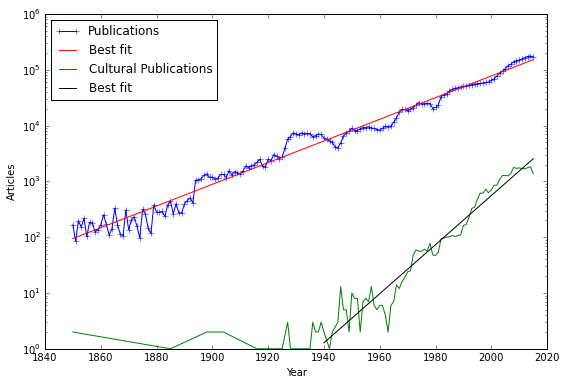

In [10]:
x = df.index
y = df.values
y_ = np.log2(y)

m1, b1 = np.polyfit(x, y_, 1)
fig = plt.figure(figsize=(9.0, 6.0))
ax = fig.add_subplot(1,1,1)

_ = plt.plot(x, y,  marker='+', label="Publications")
_ = plt.plot(x, 2**(m1*x.values + b1), 'r-', label="Best fit")


z = terms.Count[terms.index >= 1940]
z = z[z.index < 2016]
z_ = np.log2(z.values)
m2, b2 = np.polyfit(z.index, z_, 1)


plt.plot(terms.index, terms.Count, label="Cultural Publications")
_ = plt.plot(z.index, 2**(m2*z.index.values + b2), 'k-', label="Best fit")

ax.set_yscale('log')
ax.yaxis.set_major_formatter(LogFormatterMathtext())
ax.set_ylabel("Articles")
_ = ax.set_xlabel("Year")
plt.tick_params(axis='y', which='minor', labelsize=7)
_ = ax.legend(loc="upper left")

In [11]:
1.0/m2, 1.0/m1

(6.8449627759338316, array([ 15.49569969]))

In [12]:
print (b2)

-283.061858955


In [13]:
print (m2)

0.146092832457


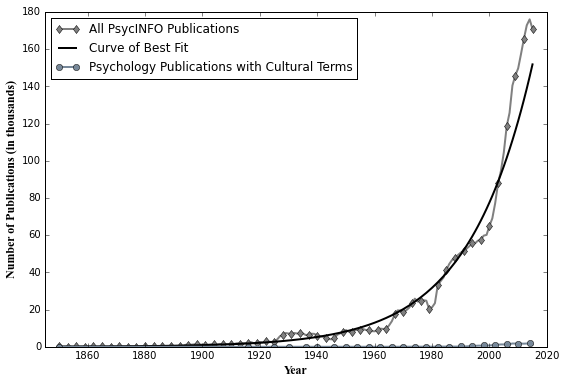

In [14]:
fig = plt.figure(figsize=(9.0, 6.0))
ax = fig.add_subplot(1,1,1)
font = {'family': "Times New Roman",
            'color': 'black',
           'size': 12}
y = df.values / 1000.0
_ = plt.plot(x, y,  marker = 'd', markevery =3, linewidth = 2, label="All PsycINFO Publications", color = 'gray')
y_ = np.log10(y)
m, b = np.polyfit(x, y_, 1)
_ = plt.plot(x, 10**(m*x.values + b), 'r-', linewidth = 2, label="Curve of Best Fit", color = 'black')
ax.set_ylabel("Number of Publications (in thousands)", font)
_ = ax.set_xlabel("Year", font)
plt.tick_params(axis='y', which='minor', labelsize=7)
z = terms.Count[terms.index >= 1940]/1000
z = z[z.index < 2016]
z_ = np.log2(z.values)
plt.plot(terms.index, terms.Count/1000, marker = 'o', markevery = 4, linewidth = 2, label="Psychology Publications with Cultural Terms", color = 'lightslategray')
m2, b2 = np.polyfit(z.index, z_, 1)
#_ = plt.plot(z.index, 2**(m2*z.index.values + b2), 'r-', linewidth = 2, label="Curve of Best Fit", color = 'black')
_ = ax.legend(loc='best')
_ = plt.xlim(1845, 2020)

In [15]:
y_ = np.log2(y*1000)
m, b = np.polyfit(x, y_, 1)
print("2**({}*x+{})".format(m[0], b[0]))

2**(0.0645340333298942*x+-112.82389398698189)


In [16]:
1.0/m

array([ 15.49569969])


y = $2^{\frac{13x}{200} - 112.79}  $ 

every 15.50 years or 15 years and 6 months, publications double. 

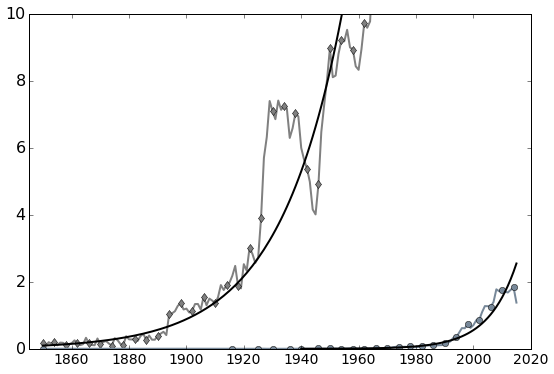

In [22]:
fig = plt.figure(figsize=(9.0, 6.0))
ax = fig.add_subplot(1,1,1)
font = {'family': "Times New Roman",
            'color': 'black',
           'size': 12}
y = df.values / 1000.0
_ = plt.plot(x, y,  marker = 'd', markevery =4, linewidth = 2, label="All PsycINFO Publications", color = 'gray')
y_ = np.log10(y)
m, b = np.polyfit(x, y_, 1)
_ = plt.plot(x, 10**(m*x.values + b), 'r-', linewidth = 2, label="Curve of Best Fit", color = 'black')
#ax.set_ylabel("Number of Publications (in thousands)", font)
#_ = ax.set_xlabel("Year", font)
plt.tick_params(axis='y', which='major', labelsize=16)
plt.tick_params(axis='x', which='major', labelsize=14)



z = terms.Count[terms.index >= 1940]/1000
z = z[z.index < 2016]
z_ = np.log2(z.values)

plt.plot(terms.index, terms.Count/1000.0, marker = 'o', markevery = 4, linewidth = 2, 
         label="Psychology Publications with Cultural Terms", color = 'lightslategray')

m2, b2 = np.polyfit(z.index, z_, 1)
_ = plt.plot(z.index, 2**(m2*z.index.values + b2), 'r-', linewidth = 2, label="Curve of Best Fit", color = 'black')
#_ = ax.legend(loc='best')
_ = plt.xlim(1845, 2020)
_ = plt.ylim(0, 10)